In [2]:
import ROOT as rt

In [6]:
ANF_file_name = "/eos/user/z/zewang/HZGamma_data/run2UL_data_Normalizing/ZGToLLG_zero_to_one_jet_ANF.root"
data_file_name = "/eos/user/z/zewang/HZGamma_data/run2UL_data_Normalizing/data_zero_to_one_jet.root"
tree_name = "zero_to_one_jet"
bdt_boundaries = [[0.28379330039024353, 0.4557725191116333], [0.4557725191116333, 0.5796570777893066], [0.5796570777893066, 0.7069960236549377], [0.7069960236549377, 1.]]
n_cat = len(bdt_boundaries)

ANF_file = rt.TFile.Open(ANF_file_name)
ANF_tree = ANF_file.Get(tree_name)

H_mass_ANF = rt.RooRealVar("CMS_hzg_mass", "CMS_hzg_mass", 125., 100., 180.)
BDT_score_ANF = rt.RooRealVar("BDT_score", "BDT_score", 0., 1.)

data_ANF = {}
for icat in range(n_cat):
    data_ANF["cat{}".format(icat)] = rt.RooDataSet("cat{}".format(icat),"cat{}".format(icat),rt.RooArgSet(H_mass_ANF))

for jentry in range(ANF_tree.GetEntriesFast()):
    nb = ANF_tree.GetEntry(jentry)

    if ANF_tree.H_mass<=100. or ANF_tree.H_mass>=180.: continue
    if ANF_tree.regions != 0: continue
    if ANF_tree.Z_mass>=100. or ANF_tree.Z_mass<=80.: continue
    if (ANF_tree.Z_mass + ANF_tree.H_mass) <= 185: continue
    if ANF_tree.H_mass_transfered<=100. or ANF_tree.H_mass_transfered>=180.: continue

    H_mass_ANF.setVal(ANF_tree.H_mass_transfered)
    
    if ANF_tree.BDT_score_transfered > bdt_boundaries[0][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[0][1]:
        data_ANF["cat0"].add(rt.RooArgSet(H_mass_ANF))
    elif ANF_tree.BDT_score_transfered > bdt_boundaries[1][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[1][1]:
        data_ANF["cat1"].add(rt.RooArgSet(H_mass_ANF))
    elif ANF_tree.BDT_score_transfered > bdt_boundaries[2][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[2][1]:
        data_ANF["cat2"].add(rt.RooArgSet(H_mass_ANF))
    elif ANF_tree.BDT_score_transfered > bdt_boundaries[3][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[3][1]:
        data_ANF["cat3"].add(rt.RooArgSet(H_mass_ANF))
    

In [7]:
data_file = rt.TFile.Open(data_file_name)
data_tree = data_file.Get(tree_name)

H_mass_ANF = rt.RooRealVar("CMS_hzg_mass", "CMS_hzg_mass", 125., 100., 180.)
BDT_score = rt.RooRealVar("BDT_score", "BDT_score", 0., 1.)

data = {}
for icat in range(n_cat):
    data["cat{}".format(icat)] = rt.RooDataSet("cat{}".format(icat),"cat{}".format(icat),rt.RooArgSet(H_mass_ANF))

for jentry in range(data_tree.GetEntriesFast()):
    nb = data_tree.GetEntry(jentry)

    if data_tree.H_mass<=100. or data_tree.H_mass>=180.: continue
    if data_tree.regions != 0: continue
    if data_tree.Z_mass>=100. or data_tree.Z_mass<=80.: continue
    if (data_tree.Z_mass + data_tree.H_mass) <= 185: continue

    H_mass_ANF.setVal(data_tree.H_mass)
    
    if data_tree.BDT_score > bdt_boundaries[0][0] and data_tree.BDT_score <= bdt_boundaries[0][1]:
        data["cat0"].add(rt.RooArgSet(H_mass_ANF))
    elif data_tree.BDT_score > bdt_boundaries[1][0] and data_tree.BDT_score <= bdt_boundaries[1][1]:
        data["cat1"].add(rt.RooArgSet(H_mass_ANF))
    elif data_tree.BDT_score > bdt_boundaries[2][0] and data_tree.BDT_score <= bdt_boundaries[2][1]:
        data["cat2"].add(rt.RooArgSet(H_mass_ANF))
    elif data_tree.BDT_score > bdt_boundaries[3][0] and data_tree.BDT_score <= bdt_boundaries[3][1]:
        data["cat3"].add(rt.RooArgSet(H_mass_ANF))

In [26]:
w = rt.RooWorkspace("w", "workspace")
for cat in ["cat0", "cat1", "cat2", "cat3"]:
    getattr(w,'import')(data[cat])
w.Print()
w.writeToFile("dataTest.root")

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset cat0
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::CMS_hzg_mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset cat1
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset cat2
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset cat3

RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

datasets
--------
RooDataSet::cat0(CMS_hzg_mass)
RooDataSet::cat1(CMS_hzg_mass)
RooDataSet::cat2(CMS_hzg_mass)
RooDataSet::cat3(CMS_hzg_mass)



In [27]:
f = rt.TFile("dataTest.root")
w = f.Get("w")
w.Print()
cat = "cat0"
dataset = w.data("{}".format(cat))
x = w.var("CMS_hzg_mass")
dataset.Print()


RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

datasets
--------
RooDataSet::cat0(CMS_hzg_mass)
RooDataSet::cat1(CMS_hzg_mass)
RooDataSet::cat2(CMS_hzg_mass)
RooDataSet::cat3(CMS_hzg_mass)

RooDataSet::cat0[CMS_hzg_mass] = 98092 entries


In [15]:
keysPdfs = {}
keysPdfs_plots = {}
def smoothbkg(name="", x=None, mc=None, Data=None, setting=rt.RooKeysPdf.MirrorBoth, rho = 1.0):
    keysPdf = rt.RooKeysPdf("CoreShape_{}".format(name), "CoreShape_{}".format(name), x, mc, setting, rho)

    canv = rt.TCanvas(name, name,800,1000)
    pad1 = rt.TPad(name+"pad1", name+"pad1", 0, 0.5, 1, 1)
    pad1.Draw()
    pad2 = rt.TPad(name+"pad2", name+"pad2", 0, 0, 1, 0.5)
    pad2.Draw()
    pad1.cd()
    pad1.SetLeftMargin(0.13)
    
    frame = x.frame(rt.RooFit.Title("Kernel Density Estimation with RooKeysPdf"))
    legend1 = rt.TLegend(0.7, 0.7, 0.9, 0.9)

    # Draw the smooth pdf and data
    x.setRange("unblindReg_1",100,120)
    x.setRange("unblindReg_2",130,180)

    Data.plotOn(frame, rt.RooFit.CutRange("unblindReg_1"))
    Data.plotOn(frame, rt.RooFit.CutRange("unblindReg_2"))
    keysPdf.plotOn(frame)
    frame.Draw()
    legend1.AddEntry(Data, "Data", "P")
    legend1.AddEntry(keysPdf, "Core PDF", "l")
    legend1.Draw()

    pad1.Update()
    pad1.Draw()

    pad2.cd()
    pad2.SetLeftMargin(0.13)

    frame = x.frame(rt.RooFit.Title("Kernel Density Estimation with RooKeysPdf"))
    legend2 = rt.TLegend(0.7, 0.7, 0.9, 0.9)

    mc.plotOn(frame, rt.RooFit.DrawOption("P"), rt.RooFit.MarkerColor(rt.kRed), rt.RooFit.LineColor(rt.kRed))
    keysPdf.plotOn(frame)
    frame.Draw()
    legend2.AddEntry(mc, "NAF MC", "P")
    legend2.AddEntry(keysPdf, "Core PDF", "l")
    legend2.Draw()

    pad2.Update()
    pad2.Draw()
    canv.Update()
    canv.Draw()

    return keysPdf, canv


[#1] INFO:Eval -- RooRealVar::setRange(CMS_hzg_mass) new range named 'unblindReg_1' created with bounds [100,120]
[#1] INFO:Eval -- RooRealVar::setRange(CMS_hzg_mass) new range named 'unblindReg_2' created with bounds [130,180]
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 4825 events out of 8000 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1933 events out of 8000 total events


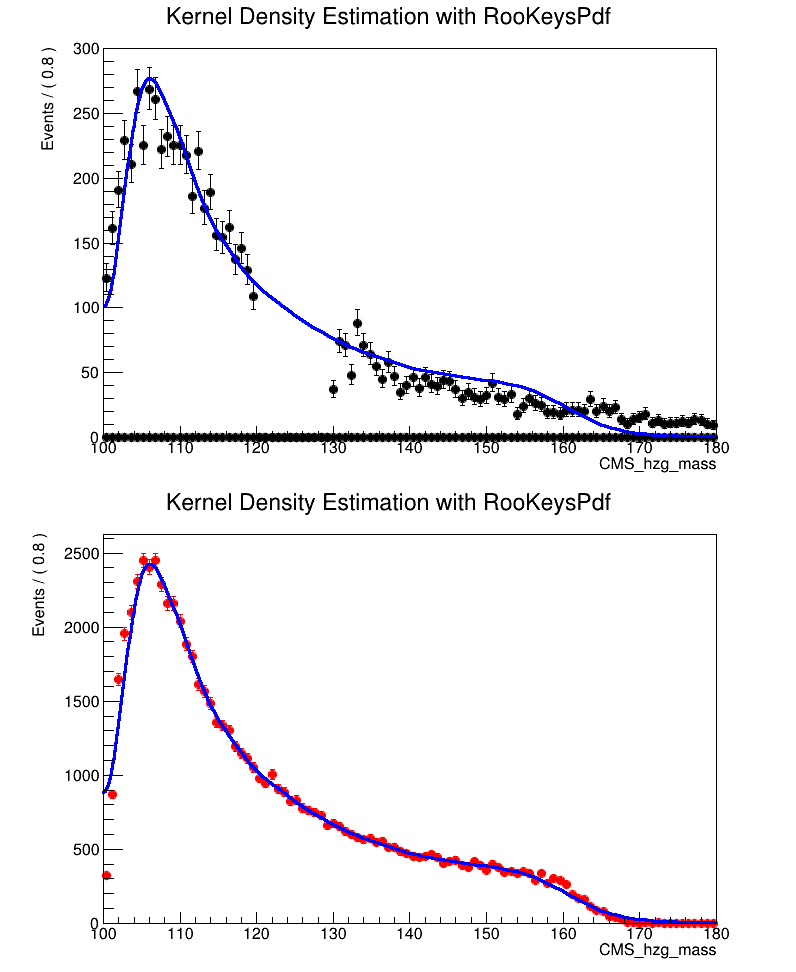

In [16]:
keysPdfs["cat3"], keysPdfs_plots["cat3"] = smoothbkg("cat3", H_mass_ANF, data_ANF["cat3"], data["cat3"], rt.RooKeysPdf.MirrorBoth, 1.5)

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 22628 events out of 35079 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 7242 events out of 35079 total events


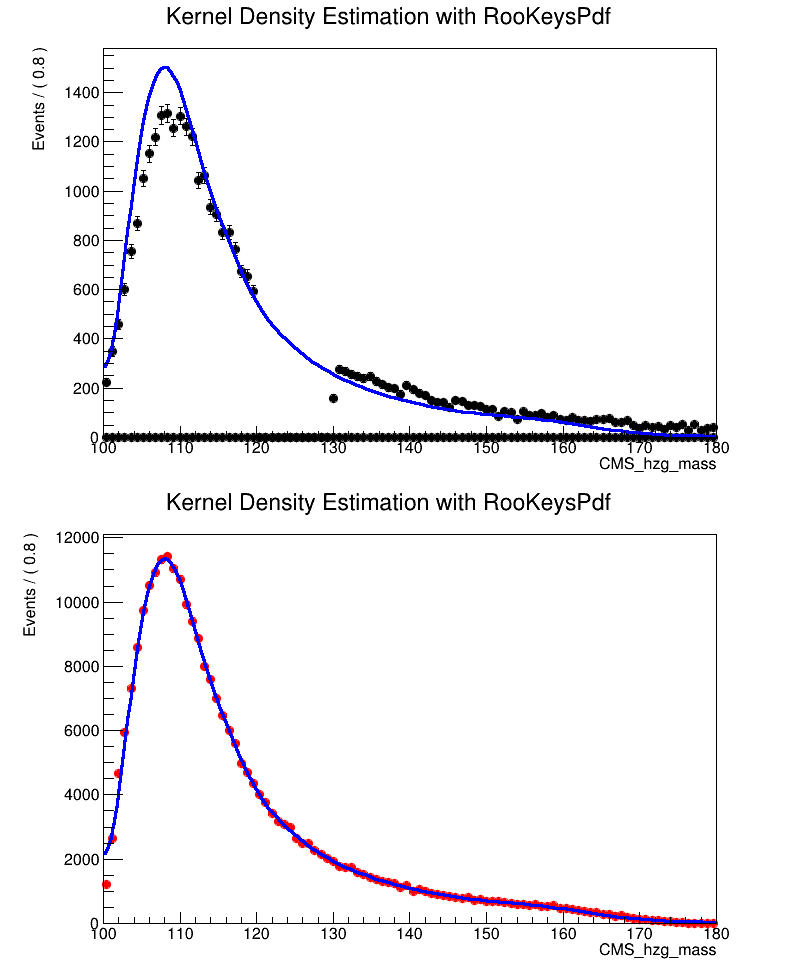

In [20]:
cat = "cat2"
keysPdfs[cat], keysPdfs_plots[cat] = smoothbkg(cat, H_mass_ANF, data_ANF[cat], data[cat], rt.RooKeysPdf.MirrorBoth, 1.5)

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 33712 events out of 64702 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 18271 events out of 64702 total events


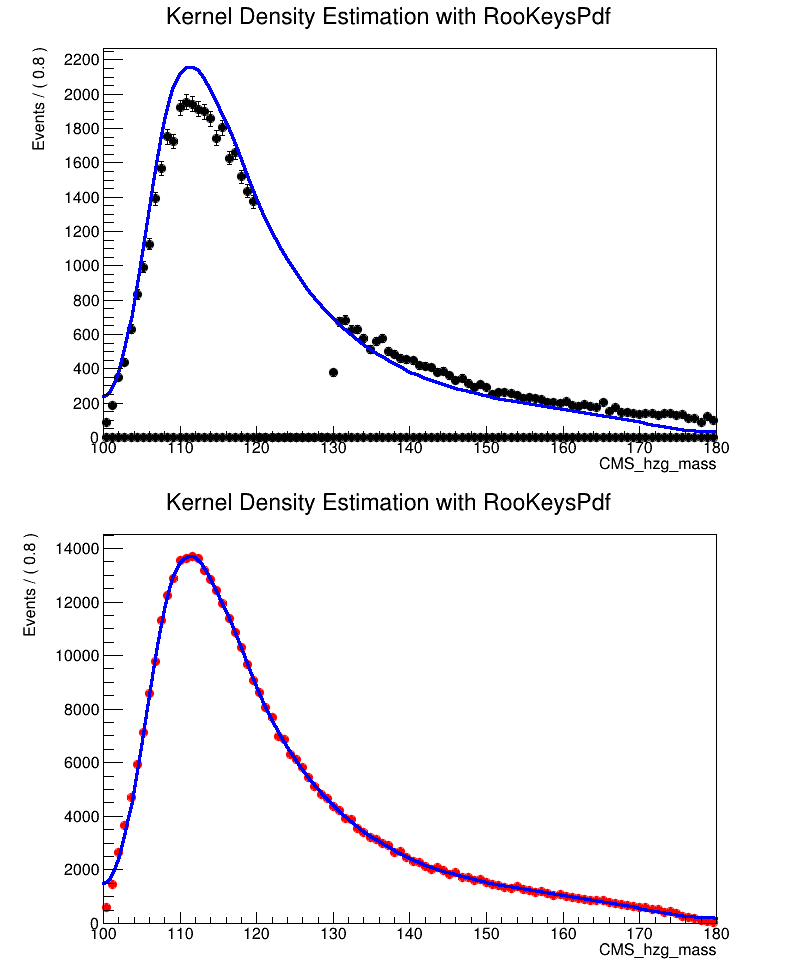

In [21]:
cat = "cat1"
keysPdfs[cat], keysPdfs_plots[cat] = smoothbkg(cat, H_mass_ANF, data_ANF[cat], data[cat], rt.RooKeysPdf.MirrorBoth, 1.5)

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 37755 events out of 98092 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 38578 events out of 98092 total events


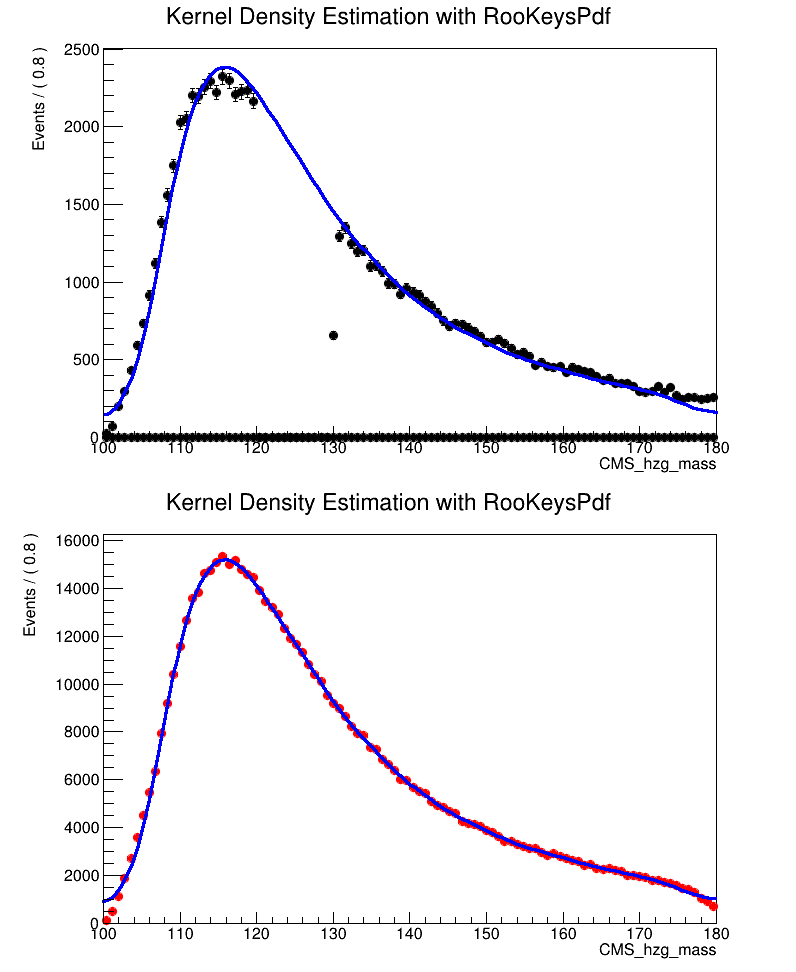

In [22]:
cat = "cat0"
keysPdfs[cat], keysPdfs_plots[cat] = smoothbkg(cat, H_mass_ANF, data_ANF[cat], data[cat], rt.RooKeysPdf.MirrorBoth, 1.5)

In [23]:
w = rt.RooWorkspace("w", "workspace")
for cat in ["cat0", "cat1", "cat2", "cat3"]:
    getattr(w,'import')(keysPdfs[cat])
w.Print()
w.writeToFile("ZGCoreShape.root")


False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooKeysPdf::CoreShape_cat0
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::CMS_hzg_mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooKeysPdf::CoreShape_cat1
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooKeysPdf::CoreShape_cat2
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooKeysPdf::CoreShape_cat3

RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

p.d.f.s
-------
RooKeysPdf::CoreShape_cat0[ x=CMS_hzg_mass ] = 0.00500107
RooKeysPdf::CoreShape_cat1[ x=CMS_hzg_mass ] = 0.00334737
RooKeysPdf::CoreShape_cat2[ x=CMS_hzg_mass ] = 0.0022994
RooKeysPdf::CoreShape_cat3[ x=CMS_hzg_mass ] = 0.00335782




RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

p.d.f.s
-------
RooKeysPdf::CoreShape_cat0[ x=CMS_hzg_mass ] = 0.00500107
RooKeysPdf::CoreShape_cat1[ x=CMS_hzg_mass ] = 0.00334737
RooKeysPdf::CoreShape_cat2[ x=CMS_hzg_mass ] = 0.0022994
RooKeysPdf::CoreShape_cat3[ x=CMS_hzg_mass ] = 0.00335782

0x55e074b03df0 RooKeysPdf::CoreShape_cat3 = 0.00335782 [Auto,Dirty] 
  0x55e074bbd830/V- RooRealVar::CMS_hzg_mass = 134.583


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


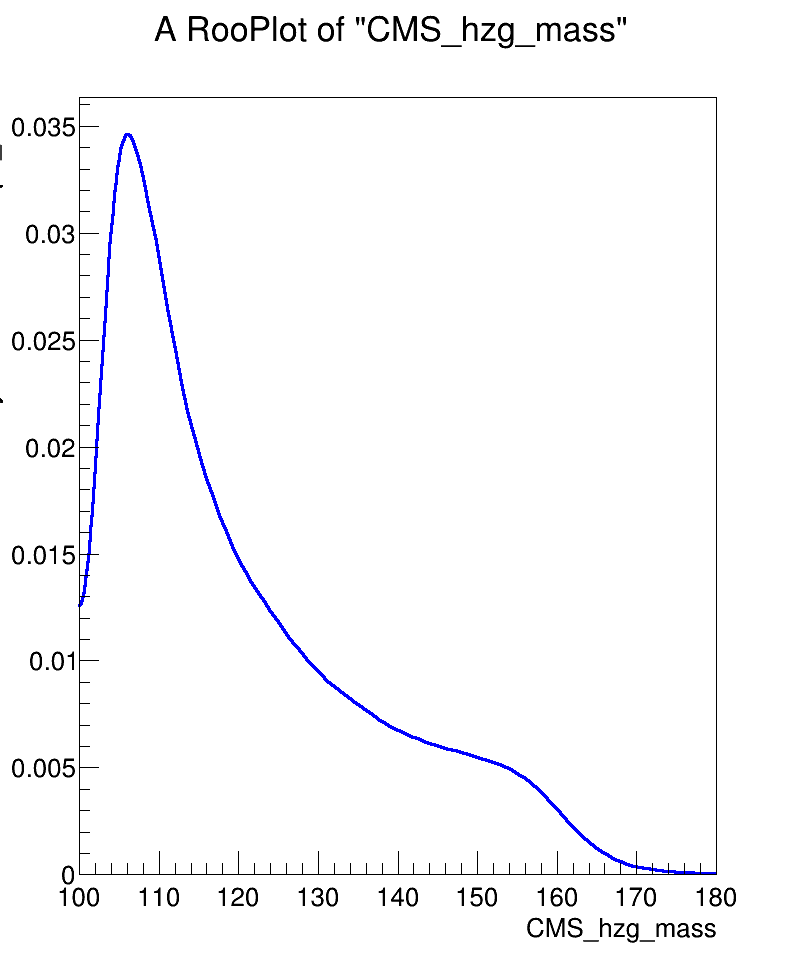

In [31]:
f = rt.TFile("ZGCoreShape.root")
w = f.Get("w")
w.Print()
model = w.pdf("CoreShape_cat3")
x = w.var("CMS_hzg_mass")
model.Print("t")
canv = rt.TCanvas("c1","c1",800,1000)
xframe = x.frame()
model.plotOn(xframe)
xframe.Draw()
canv.Draw()

# Fit Test

In [4]:
def bkg(x=None, corefunc=None, Func_type="", order=1):
    if Func_type == "exp":
        f1 = rt.RooRealVar("f1","f1",0.5,0.,1.)
        f2 = rt.RooRealVar("f2","f2",0.4,0.,1.)
        f3 = rt.RooRealVar("f3","f3",0.4,0.,1.)
        p1 = rt.RooRealVar("p1","p1",-0.01,-.1,.1)
        p2 = rt.RooRealVar("p2","p2",-0.001,-.1,.1)
        p3 = rt.RooRealVar("p3","p3",-0.005,-.1,.1)

        #pdf_exp = RooExponential("exp","exp",mass_,p1)
        exp_order1 = rt.RooFormulaVar("exp_order1", "exp_order1","@3*exp(@1*@0)",rt.RooArgList(x,p1,f1))
        exp_order2 = rt.RooFormulaVar("exp_order2", "exp_order2","@3*exp(@1*@0)+@4*exp(@2*@0)",rt.RooArgList(x,p1,p2,f1,f2))
        exp_order3 = rt.RooFormulaVar("exp_order3", "exp_order3","@4*exp(@1*@0)+@5*exp(@2*@0)+@6*exp(@3*@0)",rt.RooArgSet(x,p1,p2,p3,f1,f2,f3))

        if order == 1: 
            model_final = rt.RooEffProd("model_final", "model_final", corefunc, exp_order1)
        if order == 2: 
            model_final = rt.RooEffProd("model_final", "model_final", corefunc, exp_order2)
        if order == 3: 
            model_final = rt.RooEffProd("model_final", "model_final", corefunc, exp_order3)

    return model_final


In [3]:
f = rt.TFile("ZGCoreShape.root")
w = f.Get("w")
w.Print()
cat = "cat0"
core_model = w.pdf("CoreShape_{}".format(cat))
x = w.var("CMS_hzg_mass")


RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

p.d.f.s
-------
RooKeysPdf::CoreShape_cat0[ x=CMS_hzg_mass ] = 0.00500107
RooKeysPdf::CoreShape_cat1[ x=CMS_hzg_mass ] = 0.00334737
RooKeysPdf::CoreShape_cat2[ x=CMS_hzg_mass ] = 0.0022994
RooKeysPdf::CoreShape_cat3[ x=CMS_hzg_mass ] = 0.00335782



In [20]:
f1 = rt.RooRealVar("f1","f1",0.5,0.,1.)
f2 = rt.RooRealVar("f2","f2",0.4,0.,1.)
f3 = rt.RooRealVar("f3","f3",0.4,0.,1.)
p1 = rt.RooRealVar("p1","p1",-0.1,-.1,.1)
p2 = rt.RooRealVar("p2","p2",-0.01,-.1,.1)
p3 = rt.RooRealVar("p3","p3",-0.005,-.1,.1)

#pdf_exp = RooExponential("exp","exp",mass_,p1)
exp_order1 = rt.RooGenericPdf("exp_order1", "exp_order1","@2*exp(@1*@0)",rt.RooArgList(x,p1,f1))
exp_order2 = rt.RooFormulaVar("exp_order2", "exp_order2","@3*exp(@1*@0)+@4*exp(@2*@0)",rt.RooArgList(x,p1,p2,f1,f2))
exp_order3 = rt.RooFormulaVar("exp_order3", "exp_order3","@4*exp(@1*@0)+@5*exp(@2*@0)+@6*exp(@3*@0)",rt.RooArgSet(x,p1,p2,p3,f1,f2,f3))

#model_final = rt.RooEffProd("model_final", "model_final", core_model, exp_order1)

In [21]:
model_final = rt.RooEffProd("model_final", "model_final", core_model, exp_order1)

In [ ]:
#model = bkg(x, core_model, "exp", 1)


: 

<cppyy.gbl.RooFitResult object at 0x(nil)>


ReferenceError: attempt to access a null-pointer

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_final_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(exp_order1_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (CoreShape_cat0)
 **********
 **   30 **SET PRINT           1
 **********
 **********
 **   31 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 p1          -1.00000e-01  2.00000e-02   -1.00000e-01  1.00000e-01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIAB

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


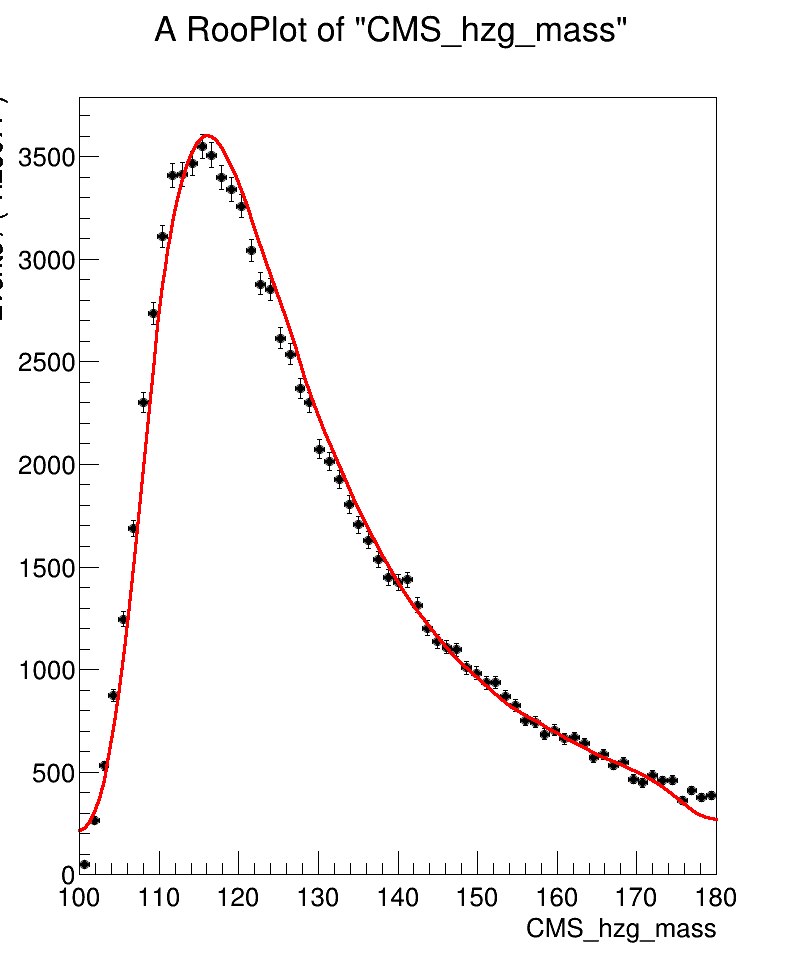

In [22]:
results = model_final.fitTo(data[cat])

canv = rt.TCanvas("c1","c1",800,1000)
frame = x.frame(65)

data[cat].plotOn(frame)
model_final.plotOn(frame,rt.RooFit.LineColor(rt.kRed))

frame.Draw()
canv.Draw()

print(results)
results.Print("v")

In [24]:
results = model_final.fitTo(data[cat])

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_final_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(exp_order1_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (CoreShape_cat0)
 **********
 **   40 **SET PRINT           1
 **********
 **********
 **   41 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           2.60287e-01  2.39713e-01    0.00000e+00  1.00000e+00
     2 p1           1.33922e-03  1.81223e-04   -1.00000e-01  1.00000e-01
 **********
 **   42 **SET ERR         0.5
 **********
 **********
 **   43 **SET PRINT           1
 **********
 **********

<cppyy.gbl.RooFitResult object at 0x(nil)>